# Overview

Classification belongs to the category supervised learning where we are given with target variable along with other feature(Predictors) attribute. Unlike regression problem, target variable for classifiaction problems does not have continious values but classified into certain number of categories which we need to predict.
Generally classifictaion problems  are divided into two main categories:
1. Binary Classication Problem: These problems have only 2 classifiers that can be 0/1 (Yes/No) or can be any other 2 categories.
2. Multiple classification problems: These problems can have multiple classifiers.

In this work, First I will visualize the data before applying any classification problem and then applying four different classification algorithms andd visualize the results. Following are the four algorithms that I will discuss:
1. Pocket Algorithm.
2. Quadratic Discriminant Analysis (QDA).
3. Linear Discriminant Analysis (LDA).
4. Logistic Regression.

# Data

## About

The dataset was about four wilderness areas located in the Roosevelt National Forest of northern Colorado. We need to predict an integer classification for the forest cover type. The seven types are:

1.  Spruce/Fir
2.  Lodgepole Pine
3.  Ponderosa Pine
4.  Cottonwood/Willow
5.  Aspen
6.  Douglas-fir
7.  Krummholz

**Attributes**

1. Elevation - Elevation in meters
2. Aspect - Aspect in degrees azimuth
3. Slope - Slope in degrees
4. Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
5. Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
6. Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
7. Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
8. Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
9. Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
10. Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
11. Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
12. Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
13. Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

**The wilderness areas are:**

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

**The soil types are:**

1.  Cathedral family - Rock outcrop complex, extremely stony.
2.  Vanet - Ratake families complex, very stony.
3.  Haploborolis - Rock outcrop complex, rubbly.
4.  Ratake family - Rock outcrop complex, rubbly.
5.  Vanet family - Rock outcrop complex complex, rubbly.
6.  Vanet - Wetmore families - Rock outcrop complex, stony.
7.  Gothic family.
8.  Supervisor - Limber families complex.
9.  Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, accuracy_score, f1_score

In [2]:
dt = pd.read_csv("covtype.csv")

In [3]:
dt.shape

(581012, 55)

In [4]:
dataset = dt.sample(n= 25000)

The above code is just taking random 20000 sample from the dataset because our initial dataset has very large number of samples (more than half a million). So we just sample out the data in order to reduce the computation time.

In [5]:
# Resetting the index for our sampled dataset
dataset = dataset.reset_index(drop=True)

In [6]:
dataset.shape

(25000, 55)

In [7]:
print(dataset['Cover_Type'].value_counts())

2    12058
1     9251
3     1567
7      873
6      718
5      412
4      121
Name: Cover_Type, dtype: int64


In [8]:
corr = dataset.corr()

In [9]:
corr['Cover_Type'].sort_values(ascending = False)

Cover_Type                            1.000000
Wilderness_Area4                      0.322347
Soil_Type10                           0.247877
Soil_Type38                           0.167663
Slope                                 0.155780
Soil_Type39                           0.151369
Soil_Type6                            0.114713
Soil_Type2                            0.107528
Soil_Type40                           0.107127
Soil_Type4                            0.105306
Soil_Type17                           0.092920
Soil_Type37                           0.090300
Soil_Type1                            0.087635
Soil_Type5                            0.082320
Vertical_Distance_To_Hydrology        0.077259
Soil_Type35                           0.069423
Soil_Type3                            0.067772
Wilderness_Area3                      0.060622
Soil_Type14                           0.059165
Soil_Type11                           0.031787
Aspect                                0.025647
Soil_Type13  

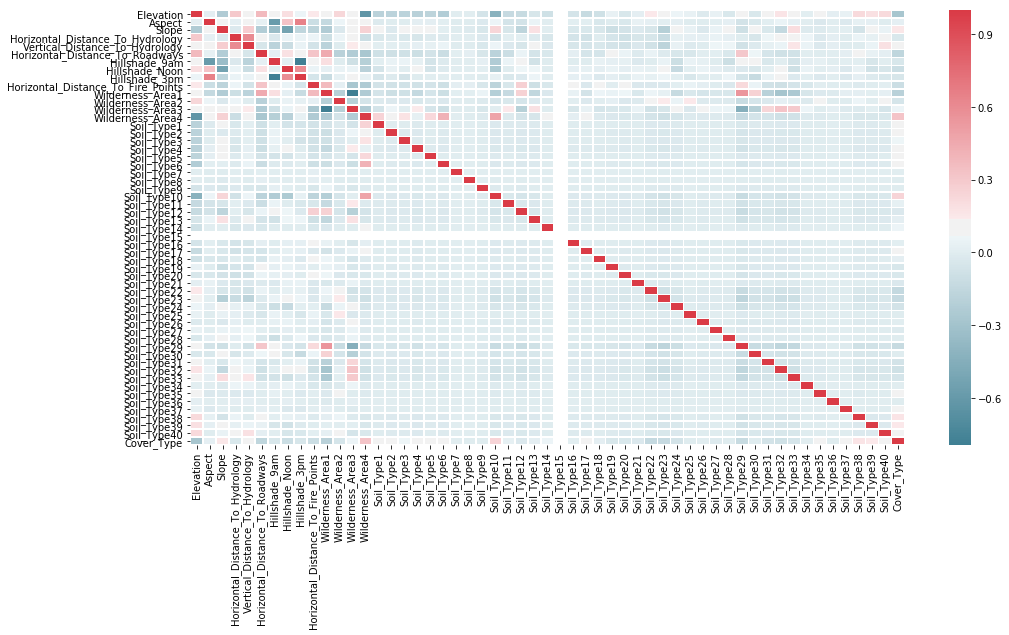

In [10]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)  
plt.figure(figsize = (16,8)) 
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, linewidths=.5)

In [11]:
dataset_new = dataset.loc[:,['Horizontal_Distance_To_Roadways', 'Soil_Type22', 'Soil_Type23', 'Soil_Type29','Horizontal_Distance_To_Fire_Points', 'Slope', 'Wilderness_Area4', 'Soil_Type39', 'Soil_Type38', 'Soil_Type2', 'Soil_Type40', 'Soil_Type4', 'Cover_Type']]

In [12]:
list(dataset_new)

['Horizontal_Distance_To_Roadways',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type29',
 'Horizontal_Distance_To_Fire_Points',
 'Slope',
 'Wilderness_Area4',
 'Soil_Type39',
 'Soil_Type38',
 'Soil_Type2',
 'Soil_Type40',
 'Soil_Type4',
 'Cover_Type']

In [13]:
print(dataset_new['Cover_Type'].value_counts())

2    12058
1     9251
3     1567
7      873
6      718
5      412
4      121
Name: Cover_Type, dtype: int64


In [14]:
corr_new = dataset_new.corr()
corr_new

,Horizontal_Distance_To_Roadways,Soil_Type22,Soil_Type23,Soil_Type29,Horizontal_Distance_To_Fire_Points,Slope,Wilderness_Area4,Soil_Type39,Soil_Type38,Soil_Type2,Soil_Type40,Soil_Type4,Cover_Type
Horizontal_Distance_To_Roadways,1.000000,0.044105,-0.012895,0.313312,0.327331,-0.219855,-0.274043,0.034253,0.078765,-0.086105,0.018446,-0.093267,-0.157039
Soil_Type22,0.044105,1.000000,-0.080298,-0.121714,-0.027033,-0.050552,-0.063598,-0.038128,-0.040094,-0.026615,-0.031304,-0.036776,-0.139427
Soil_Type23,-0.012895,-0.080298,1.000000,-0.165880,-0.022898,-0.207770,-0.086676,-0.051964,-0.054643,-0.036273,-0.042663,-0.050121,-0.131833
Soil_Type29,0.313312,-0.121714,-0.165880,1.000000,0.219503,-0.090085,-0.131382,-0.078766,-0.082828,-0.054982,-0.064668,-0.075972,-0.121053
Horizontal_Distance_To_Fire_Points,0.327331,-0.027033,-0.022898,0.219503,1.000000,-0.175230,-0.235193,-0.005943,-0.012452,-0.077845,0.006071,-0.077065,-0.105486
Slope,-0.219855,-0.050552,-0.207770,-0.090085,-0.175230,1.000000,0.257713,0.108268,-0.065269,-0.022470,0.043698,0.126702,0.155780
Wilderness_Area4,-0.274043,-0.063598,-0.086676,-0.131382,-0.235193,0.257713,1.000000,-0.041157,-0.043279,0.105285,-0.033790,0.026394,0.322347
Soil_Type39,0.034253,-0.038128,-0.051964,-0.078766,-0.005943,0.108268,-0.041157,1.000000,-0.025947,-0.017224,-0.020258,-0.023799,0.151369
Soil_Type38,0.078765,-0.040094,-0.054643,-0.082828,-0.012452,-0.065269,-0.043279,-0.025947,1.000000,-0.018112,-0.021303,-0.025026,0.167663
Soil_Type2,-0.086105,-0.026615,-0.036273,-0.054982,-0.077845,-0.022470,0.105285,-0.017224,-0.018112,1.000000,-0.014141,-0.016613,0.107528


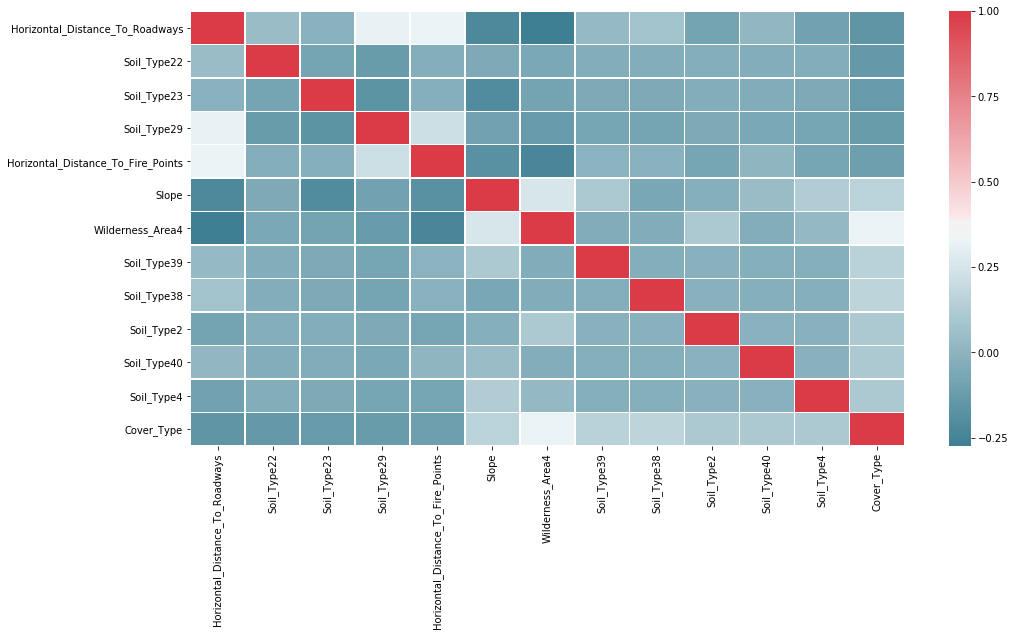

In [15]:
cmap = sb.diverging_palette(220, 10, as_cmap=True)  
plt.figure(figsize = (16,8)) 
sb.heatmap(corr_new, xticklabels=corr_new.columns.values, yticklabels=corr_new.columns.values, cmap=cmap, linewidths=.5)

### Changing the Multi class to Binary class

In [16]:
change = {1:-1, 2:1, 3:-1, 4:-1, 5:-1, 6:-1, 7:-1}
dataset_binary = dataset_new
dataset_binary['Cover_Type'] = dataset_binary['Cover_Type'].replace(change)

In [17]:
print(dataset_binary['Cover_Type'].value_counts())
print(dataset_binary.shape)

-1    12942
 1    12058
Name: Cover_Type, dtype: int64
(25000, 13)


In [18]:
np.any(dataset_new.isnull())

False

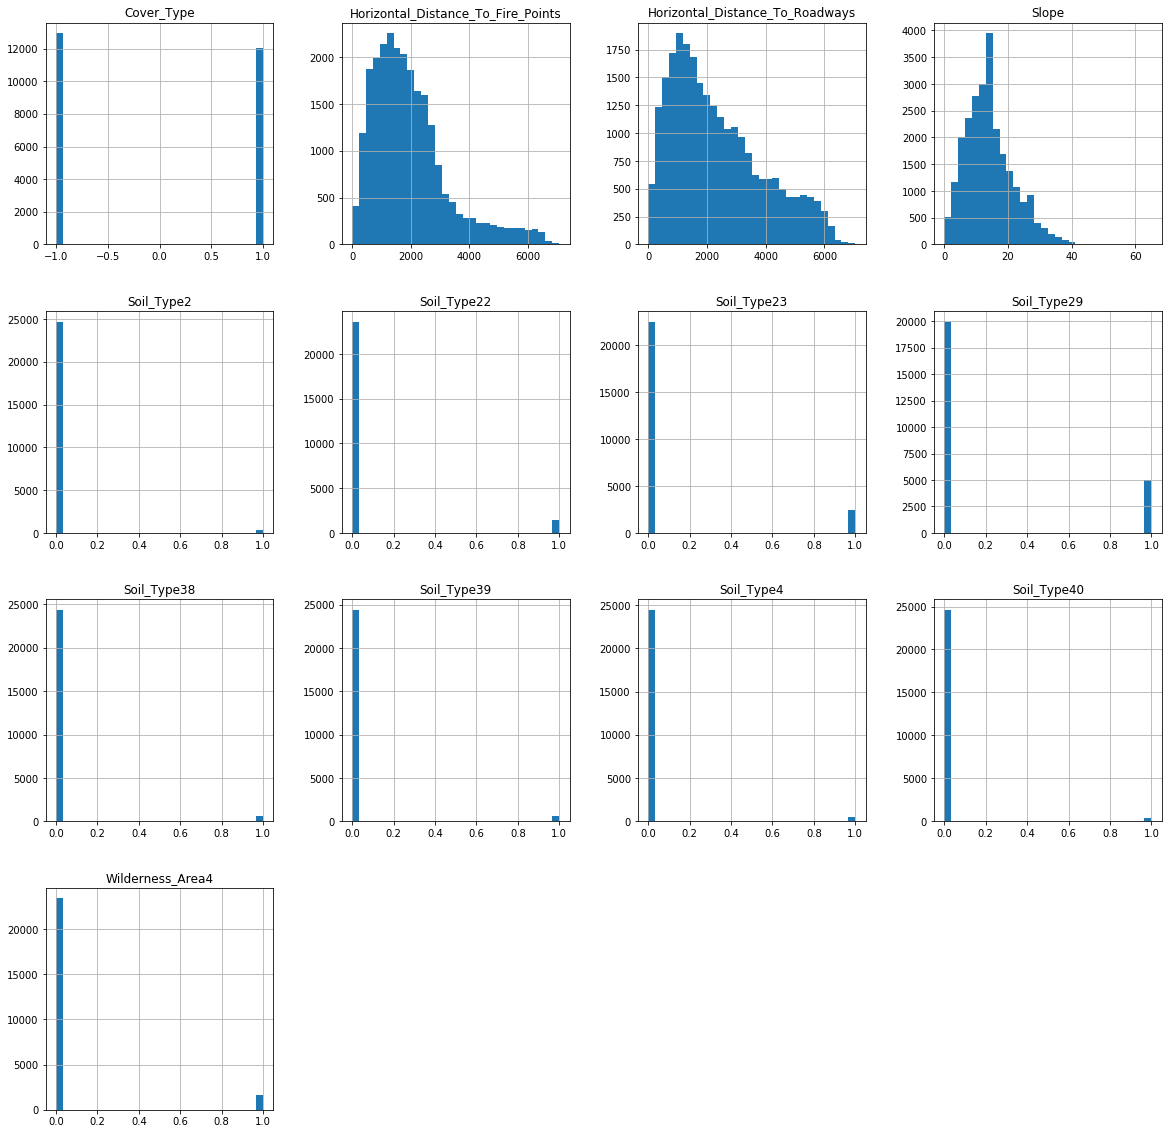

In [19]:
dataset_new.hist(bins = 30, figsize=(20,20))
plt.show()

The above plotted 2 histograms are for complete dataset and for filtered samples datasets repectively. We can 

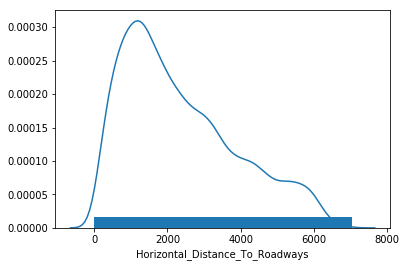

In [24]:
sb.distplot(dataset_new['Horizontal_Distance_To_Roadways'], hist=False, rug=True)

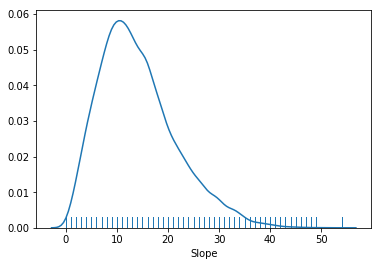

In [25]:
sb.distplot(dataset_new['Slope'], hist=False, rug=True)

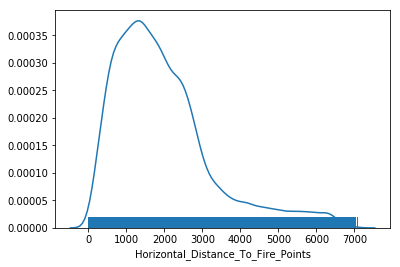

In [92]:
sb.distplot(dataset_new['Horizontal_Distance_To_Fire_Points'], hist=False, rug=True)

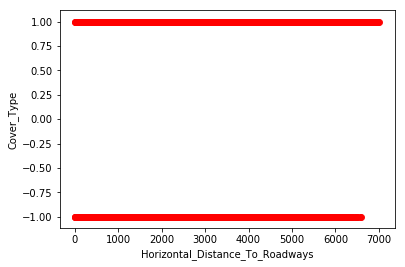

In [41]:
plt.scatter(dataset_binary.iloc[:,0:1],dataset_binary.iloc[:,12:13], color = 'red', alpha=.9)
plt.xlabel("Horizontal_Distance_To_Roadways")
plt.ylabel("Cover_Type")
plt.show()

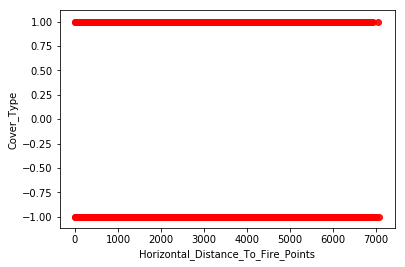

In [24]:
plt.scatter(dataset_binary.iloc[:,4:5],dataset_binary.iloc[:,12:13], color = 'red', alpha=.9)
plt.xlabel("Horizontal_Distance_To_Fire_Points")
plt.ylabel("Cover_Type")
plt.show()

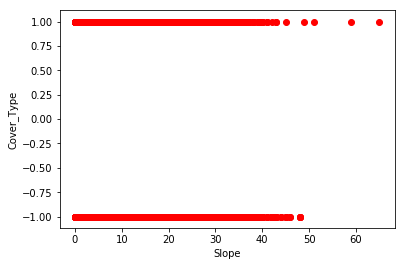

In [25]:
plt.scatter(dataset_binary.iloc[:,5:6],dataset_binary.iloc[:,12:13], color = 'red')
plt.xlabel("Slope")
plt.ylabel("Cover_Type")
plt.show()

## Preliminary Observation

In this workbook, I started with playing and trying out different things with the original data for certain reasons. Initially, I start with selecting some '25000' random samples from the complete dataset as the comlete dataset was really large (around 600,000) samples. So to reduce the computation time, I have sampled the dataset. Apart from that, in this datatset the feature values reach out 55 after applying Encoding so I selected around 15 attributes to the algorithms. I filter out the attributes on the basis of correlation table, out of all attributes, columns that are highly correlated with target variable and some attributes that are negatively correlated are selected. And columns that are highly correlated with each other irrespective of target varible are dropped, to avoid Multi-Collinearity problem. Last thing that I alter in dataset is that I converted the Multi-Class classification problem into Binary classification for easy understanding of the algorithms that are further implemented.

Starting with **data preprocessing** part, there are no Null values in our dataset. And no issues from the part of categorical attributes because the datatset we got was already Encoded. And Normalization of the data will be handled during the implementation of each algorithm and that can be done in data preprocessing part also, so no difference in that.

To **pre-visualize** the data, first of all I understand the imporatnce of each attribute through the correlation matrix, which is used to filter out the atttributes also. Followed by visualizing the histograms for each attribute, we can interpret how data is distributed among different in that particular column. From the histogram, we can easily observe that almost all the **Soil Type** attributes have values 0 for most of the samples and **Cover_Type**(Target attribute) contains around half the values as class 2 follwed by 1 and all other pretty low as compared to the earlier ones. Another most important visualization was distributed plots with 3 different attributes to check how overall data is distributed for that particular attribute. Primary motive was to check that whether our data is **Normally distributed** or not. So none of them was exactly normally distributed, which means our data is skewed. From the last three scatter plots that **Cover_Type**=1 (Actually i.e 2) are the only ones that are present on higher slopes and present over complete range of Horizontal distance to fire and roadways.



# Methods

## Summary of Classification models
We are discussing four classification models:
1. Pocket Algorithm.
2. Quadratic Discriminant Analysis (QDA).
3. Linear Discriminant Analysis (LDA).
4. Logistic Regression.


1. So starting with **Pocket Algorithm**: This algorithm introduced to overcome the drwaback of Perceptron algorithm. The perceptron algorithm applies step function on linear output of linear model. It update the weights, iterating over the whole trainig set.
Error functionn is defined as:
$$
E = \frac{1}{N}  \sum_{i=1}^N 1[sign(W^T X_i) \ne t_i]
$$
The pocket algorithm keeps the best weights while iterating over whole trainig set and finally use that for prediction for best results

2. **QDA**: This algorithm falls under the category of Geneartive Model which are pobabilistic unlike Pocket/ Perceptron algorithm. So they estimate joint probability for input X and target T which is calculated with the help of conditional probability andd is given by: 

$$
P(X \mid T) = P(X \mid T)P(T) = P(T \mid X)P(X)
$$


$$
P(T \mid X) = \frac {P(X \mid T) P(T)} {P(X)}
$$

It is further calculated discriminant function based on certain assumptions like our data is equally sampled and most important that our data is **Normally distributed**. 

$$
\delta_k (x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^T \vert \boldsymbol\Sigma_k       \vert^{-1} (x - \boldsymbol\mu_k) + \ln P(T = K)
$$

We calculate the discriminant for each classifier for our test set and finallly choose the maximum from all the discriminants we get at the end for each classifier. 

3. **LDA**: This algorithm is no different from QDA except on thing that unlike the QDA, it calclates the covariance matrix ($ \boldsymbol\Sigma $) only once while QDA calculates the covariance matrix for each classifier. It uses same covariances for all the classes. 
It is give by:
$$
\delta_k(x) = x^T \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

4. **Logistic Regression**: It is considered as linear regression model that presdicts the probability of predicting each class for each sample. It does not predict directly the class label. In this case Target variable will be matrix of N*K not the vector of size N. (N = Number of samples and K = Number of classes). Similarly the weight in this case will not be vector anymore but it would also be a matrix of (D+1)*K (D+1 = Number of attributes in our dataset and +1 for bias).

So this algorithm calculates best weights by iterating over the dataset:

$$
w = w + \alpha X^T(T - g(X))
$$
where, $g(X)$ is calculated by softmax transformation which returns probabilities for each class and for each sample i.e matrix of N*K. 

## Explanation of Codes

1. **Pocket Algorithm**: **Perceptron** class is defined for this algorithm which is inheriting Classifier class. It contains 3 member variables:

    -> w- Which store the weights calculated for each sample.

    -> w_pocket - It will store the best weight till that particular iteration.

    -> alpha - It is our learning rate.

    ##### This class has 3 functions:

   -> train: It is iterating over all the training samples for any number of epochs to calculate the best weights for prediction.

   -> compare: This method is called from train method for each iteration to compare the weight calculated in that iteration and already stored weights(w_pocket).

   -> use: This function finally predicts the outcome from best stored weights(w-pocket) over all the iterations.


2. **QDA**: For this algorithm QDA class is defined and it is also inheriting Classifier class. This algorithm contains 3 member variables for each class in our dataset.

    -> mu - Mean of particular class of training data.

    -> sigma - Covariance matrix for each class of training data. 

    -> prior - Prior proabability for each class.

    ##### It also contains 3 methods:

    -> train: this method is calculating mu, sigma, prior for all the classes in our training dataset.

    -> use: This method is calculating probabilities for each class of our test dataset and storing in d1, d2 and so on.

    -> calculate_QDA: This is actual function which is calculating the proababilities  on test set with calculated mu, sigma prior for each class. It is called from the use method for number of classes we have.


3. **LDA**: For this algorithm LDA class is defined and it is also inheriting Classifier class. This algorithm contains 2 member variables for each class in our dataset and only sigma for all the classes.

    -> mu - Mean of particular class of training data.

    -> sigma - Covariance matrix for complete training data which is ised for all the classes.

    -> prior - Prior proabability for each class.

    ##### It also contains 3 methods:

    -> train: this method is calculating mu, prior for all the classes and sigma only once and use that for all the classes in our training dataset.

    -> use: This method is calculating probabilities for each class of our test dataset and storing in d1, d2 and so on.

    -> calculate_LDA: This is actual function which is calculating the proababilities on test set with calculated mu, prior for each class and same sigma for all the classes. It is called from the use method for number of classes we have.
    
4.  **Logistic Regression**: **Logistic** is the class defined for this algorithm which is inheriting Classifier class. It contains 2 member variables:

    -> w- Which store the weights calculated for each sample.

    -> alpha - It is our learning rate.

    ##### This class also has 3 functions:

    -> train: It is iterating over number of times to calculate the best weights for prediction.

    -> softmax: This method is calclating the probabilities using softmax function.
    
    -> use: This function finally predicts the probabilities of each class for each test sample  with from best calculated weights. 


## 	Pocket, LDA, QDA, Logistic Regression

In [21]:
# Splitting the training and test data
from sklearn.model_selection import train_test_split
def split(X, T):
    return train_test_split(X, T, test_size = .2) 

In [22]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        
        Xs = (X - self.meanX) / self.stdX 
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

### Pocket

In [122]:
from copy import deepcopy as copy

class Perceptron(Classifier):
    
    def __init__(self, alpha):
        self.w = None
        self.w_pocket = None
        self.alpha = alpha
        
    def compare(self, X1, T, w, w_pocket):
        y = np.sign(X1 @ w)
        y_pocket = np.sign(X1 @ w_pocket)
        
        return 1 if(np.sum(y == T) > np.sum(y_pocket == T)) else -1
        
    def train(self, X, T):
        maxiter = 1
        X1 = super().normalize(X)
        X1 = super().add_ones(X)
        #print(X1)
        
        self.w = np.zeros(X1.shape[1])
        self.w_pocket = copy(self.w)
        
        for i in range(maxiter):
            converge = True
            for j in range(X.shape[0]):
                y = X1[j] @ self.w
                if(np.sign(y) != np.sign(T[j])):
                    self.w += self.alpha * X1[j] *T[j]
                    converge = False
                    
                    if(self.compare(X1, T, self.w, self.w_pocket) > 0):
                        self.w_pocket[:] = self.w[:]
            
            if converge:
                break
                
    def use(self, X):
        X1 = super().normalize(X)
        X1 = super().add_ones(X)
        return X1 @ self.w_pocket
    

In [24]:
X_pocket = dataset_binary.iloc[:,:-1].values
T_pocket = dataset_binary.iloc[:,-1].values

In [25]:
#Splitting the datsets onto test and train for Pocket algorithm.
X_train_pocket, X_test_pocket, T_train_pocket, T_test_pocket = split(X_pocket, T_pocket)

print("Shape of X_train_pocket{}, X_test_pocket{}, T_train_pocket{}, T_test_pocket{}"
      .format(X_train_pocket.shape, X_test_pocket.shape, T_train_pocket.shape, T_test_pocket.shape))

Shape of X_train_pocket(20000, 12), X_test_pocket(5000, 12), T_train_pocket(20000,), T_test_pocket(5000,)


In [26]:
perceptron = Perceptron(.000002)
perceptron.train(X_train_pocket, T_train_pocket)
y_pred = perceptron.use(X_test_pocket)

y_pred_pocket = np.where(y_pred < 0, -1, 1)

## QDA

In [30]:
class QDA(Classifier):
    
    def __init__(self):
        self.mu1 = None
        self.sigma1 = None
        self.prior1 = None
      
        self.mu2 = None
        self.sigma2 = None
        self.prior2 = None
        
    def train(self, X, N1, N2):
        N = N1 + N2
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.sigma1 = np.cov(Xs[:N1].T)
        self.prior1 = N1 / N
        
        self.mu2 = np.mean(Xs[N1:], 0)
        self.sigma2 = np.cov(Xs[N1:].T)
        self.prior2 = N2 / N
        
    def calculate_QDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diff = X - mu
        
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
                
    def use(self, X):
        Xs = self.normalize(X)
        d1 = self.calculate_QDA(Xs, self.mu1, self.sigma1, self.prior1)
        d2 = self.calculate_QDA(Xs, self.mu2, self.sigma2, self.prior2)
        return d1 , d2
      

In [31]:
X_qda = dataset_binary.iloc[:,:-1]
T_qda = dataset_binary.iloc[:,-1]

In [32]:
#Splitting the datsets onto test and train for QDA algorithm.
X_train_qda, X_test_qda, T_train_qda, T_test_qda = split(X_qda, T_qda)

print("Shape of X_train_qda{}, X_test_qda{}, T_train_qda{}, T_test_qda{}"
      .format(X_train_qda.shape, X_test_qda.shape, T_train_qda.shape, T_test_qda.shape))

Shape of X_train_qda(20000, 12), X_test_qda(5000, 12), T_train_qda(20000,), T_test_qda(5000,)


Combining the **X_train_qda** and  **T_train_qda**, so that we can separate the training data according to positive and negatiive classifier.

In [33]:
X_train_qda_combine = pd.concat([X_train_qda, T_train_qda], axis=1)
print("Shape of X_train_qda_combine", X_train_qda_combine.shape)

Shape of X_train_qda_combine (20000, 13)


Sorting the **X_train_qda_combine** according to the classifier for training.

In [34]:
X_train_qda_combine= X_train_qda_combine.sort_values(by=['Cover_Type'])

In [35]:
X_train_qda_combine.groupby('Cover_Type').size()

Cover_Type
-1    10354
 1     9646
dtype: int64

Calculating the total number of negative classifier(N1) and positive classifier(N2).

In [36]:
N1 = X_train_qda_combine.loc[X_train_qda_combine['Cover_Type'] == -1, 'Cover_Type'].count() 
N2 = X_train_qda_combine.loc[X_train_qda_combine['Cover_Type'] == 1, 'Cover_Type'].count() 
N = N1 + N2
print("Values of N1 {}, N2 {} and N {}".format(N1, N2, N))

Values of N1 10354, N2 9646 and N 20000


In [37]:
X_train_qda_combine.shape

(20000, 13)

In [38]:
print(len(T_test_qda[T_test_qda == 1]))

2412


In [39]:
X_train_qda_combine = X_train_qda_combine.values
X_test_qda = X_test_qda.values
T_train_qda = T_train_qda.values
T_test_qda = T_test_qda.values

In [40]:
qda = QDA()
qda.train(X_train_qda_combine[:,:-1], N1, N2)
d1_qda, d2_qda = qda.use(X_test_qda)

d3_qda = np.argmax((d1_qda, d2_qda), axis=0)
y_pred_qda = np.where(d3_qda == 0, -1, 1)

## LDA

In [44]:
class LDA(Classifier):
    
    def __init__(self):
        self.mu1 = None
        self.prior1 = None
        
        self.sigma = None
        
        self.mu2 = None
        self.prior2 = None
        
    def train(self, X, N1, N2):
        N = N1 + N2
        Xs = self.normalize(X)
        
        self.mu1 = np.mean(Xs[:N1], 0)
        self.prior1 = N1 / N
        
        self.sigma = np.cov(Xs.T)
        
        self.mu2 = np.mean(Xs[N1:], 0)
        self.prior2 = N2 / N
        
    def calculate_LDA(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diff = X - mu
        
        return -0.5 * np.log(np.linalg.det(sigma)) - 0.5 * np.sum(diff @ sigma_inv * diff, axis=1) \
            + np.log(prior)
                
    def use(self, X):
        d1 = self.calculate_LDA(X, self.mu1, self.sigma, self.prior1)
        d2 = self.calculate_LDA(X, self.mu2, self.sigma, self.prior2)
        return d1, d2
      

In [45]:
X_lda = dataset_binary.iloc[:,:-1]
T_lda = dataset_binary.iloc[:,-1]

In [46]:
#Splitting the datsets onto test and train for QDA algorithm.
X_train_lda, X_test_lda, T_train_lda, T_test_lda = split(X_lda, T_lda)

print("Shape of X_train_lda{}, X_test_lda{}, T_train_lda{}, T_test_lda{}"
      .format(X_train_lda.shape, X_test_lda.shape, T_train_lda.shape, T_test_lda.shape))

Shape of X_train_lda(20000, 12), X_test_lda(5000, 12), T_train_lda(20000,), T_test_lda(5000,)


In [47]:
X_train_lda_combine = pd.concat([X_train_lda, T_train_lda], axis=1)
print("Shape of X_train_lda_combine", X_train_lda_combine.shape)

Shape of X_train_lda_combine (20000, 13)


In [48]:
X_train_lda_combine= X_train_lda_combine.sort_values(by=['Cover_Type'])

In [49]:
X_train_lda_combine.groupby('Cover_Type').size()

Cover_Type
-1    10348
 1     9652
dtype: int64

In [50]:
N1 = X_train_lda_combine.loc[X_train_lda_combine['Cover_Type'] == -1, 'Cover_Type'].count() 
N2 = X_train_lda_combine.loc[X_train_lda_combine['Cover_Type'] == 1, 'Cover_Type'].count() 
N = N1 + N2
print("Values of N1 {}, N2 {} and N {}".format(N1, N2, N))

Values of N1 10348, N2 9652 and N 20000


In [51]:
X_train_lda_combine.shape

(20000, 13)

In [52]:
X_train_lda_combine = X_train_lda_combine.values
X_test_lda = X_test_lda.values
T_train_lda = T_train_lda.values
T_test_lda = T_test_lda.values

In [53]:
lda = LDA()
lda.train(X_train_lda_combine[:,:-1], N1, N2)
d1, d2 = lda.use(X_test_lda)

d3_lda = np.argmax((d1, d2), axis=0)
y_pred_lda = np.where(d3_lda == 0, -1, 1)

### Logistic Rgeression

In [57]:
class Logistic(Classifier):
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self, z):
        f = np.exp(z)
        return f / np.sum(f, axis=1, keepdims=True)
    
    def g(self, X, w):
        return self.softmax( X @ w )
    
    def train(self, X, T):
        X1 = self.normalize(X)
        X1 = super().add_ones(X1)
        
        D = X1.shape[1]
        K = T.shape[1]
        
        max_iter = 100
        self.w = np.zeros((D,K))
        
        for i in range(max_iter):
            y = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T - y)

    def use(self, X):
        X1 = self.normalize(X)
        X1 = super().add_ones(X1)
        y = self.g(X1, self.w)
        y_pred = np.argmax(y, axis = 1)
        return y_pred

In [58]:
X_logistic = dataset_binary.iloc[:,:-1]
T_logistic = dataset_binary.iloc[:,-1]
print("Shapes of X_logistic{} and T_logistic{}".format(X_logistic.shape, T_logistic.shape))

Shapes of X_logistic(25000, 12) and T_logistic(25000,)


In [59]:
#Splitting the datsets onto test and train for Logistic algorithm.
X_train_logistic, X_test_logistic, T_train_logistic, T_test_logistic = split(X_logistic, T_logistic)

print("Shape of X_train_logistic{}, X_test_logistic{}, T_train_logistic{}, T_test_logistic{}"
      .format(X_train_logistic.shape, X_test_logistic.shape, T_train_logistic.shape, T_test_logistic.shape))

Shape of X_train_logistic(20000, 12), X_test_logistic(5000, 12), T_train_logistic(20000,), T_test_logistic(5000,)


In [60]:
X_train_logistic = X_train_logistic.reset_index(drop=True)
X_test_logistic = X_test_logistic.reset_index(drop=True)
T_train_logistic = T_train_logistic.reset_index(drop=True)
T_test_logistic = T_test_logistic.reset_index(drop=True)

#### Converting test vector to N*K matrix (K = Number of classifiers).

In [61]:
T_train_logistic_new = pd.get_dummies(T_train_logistic)
print("Shape of T_train_logistic_new",T_train_logistic_new.shape)

Shape of T_train_logistic_new (20000, 2)


In [62]:
X_train_logistic = X_train_logistic.values
X_test_logistic = X_test_logistic.values
T_train_logistic_new = T_train_logistic_new.values
T_test_logistic = T_test_logistic.values

In [63]:
# Converting all -1 values with '0', so that we can easily compare predictions of logistic regressions.
T_test_logistic_new = np.where(T_test_logistic == -1, 0,1)

In [64]:
print(len(T_test_logistic_new[T_test_logistic_new==1]))

2426


In [65]:
logistic = Logistic(.000005)
logistic.train(X_train_logistic, T_train_logistic_new)
y_pred_logistic = logistic.use(X_test_logistic)

print("Accuracy: ", 100 - np.mean(np.abs(T_test_logistic_new - y_pred_logistic)) * 100, "%")

Accuracy:  67.12 %


# Experiments

### Evaluation Metrics

After all the preprocessing and applying various algorithms on our dataset, ultimately we need to check or visualize its performance. And there different means for performance evaluation in each category of Machine Learrning models. For Classification models are to check for Precision, Recall, Area Under the Curve, Accuracy are various performace metrics. 

1. **Confusion Matrix**: This can be used for both binary as well as Multiple classification problems. Four terms are associated with it:

    i) True Positives(TP):    This is the case when actual class of data points are True and predicted class is also True.
    
    ii) True Negatives(TN):   This is the case when actual class of data points are False predicted class is also False.
    
    iii) False Positives(FP): It is the case where the actual class of data points are False and predicted is True.
    
    iv) False Negatives(FN):  It is the case where the actual class of data points are True and predicted is False.
    
2. **Accuracy**: It is simply number of correct predictions out of all the predictions made by a model.

$$
Accuracy = \frac {TP + TN} {TP + FP + FN + TN} 
$$

Genearlly, it should not be used when majority of target variable in our dataset are of single class.

3. **Precision**: It just tells us that how accurate our predictions are. 
$$
Precision = \frac {TP} {TP + FP} 
$$

4. **Recall**: Recall tells us about the actual positives.
$$
Recall = \frac {TP} {TP + FN} 
$$

5. **F1 Score**: Each time we do not need to take care of both Precision and Recall, as both show opposite behaviour to each other. If Recall increase, then precision decreases and vice-versa. So F1 is the single score that represents both Precision and Recall. We calculate by taking Harmonic Mean of both.


$$
F1  Score: \frac {TP}{TP + \frac {FN + FP}{2}}
$$

## Train and Test Accuracies:

### Pocket 

In [28]:
confusion_matrix(T_test_pocket, y_pred_pocket)

array([[2055,  585],
       [1604,  756]], dtype=int64)

In [29]:
precision_pocket = precision_score(T_test_pocket, y_pred_pocket)
recall_pocket = recall_score(T_test_pocket, y_pred_pocket)
f1_pocket = f1_score(T_test_pocket, y_pred_pocket)
accuracy_pocket = accuracy_score(T_test_pocket, y_pred_pocket)
print("Calculated scores for Pocket Algorithm:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_pocket, recall_pocket, f1_pocket, accuracy_pocket))

Calculated scores for Pocket Algorithm:
Precision: 0.5637583892617449, Recall: 0.32033898305084746, F1: 0.40853823291002433, Accuracy: 0.5622


### QDA

In [42]:
confusion_matrix(T_test_qda, y_pred_qda)

array([[ 957, 1631],
       [ 120, 2292]], dtype=int64)

In [43]:
precision_qda = precision_score(T_test_qda, y_pred_qda)
recall_qda = recall_score(T_test_qda, y_pred_qda)
f1_qda = f1_score(T_test_qda, y_pred_qda)
accuracy_qda = accuracy_score(T_test_qda, y_pred_qda)
print("Calculated scores for QDA:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_qda, recall_qda, f1_qda, accuracy_qda))

Calculated scores for QDA:
Precision: 0.5842467499362732, Recall: 0.9502487562189055, F1: 0.7235990528808208, Accuracy: 0.6498


### LDA

In [55]:
confusion_matrix(T_test_lda, y_pred_lda)

array([[ 947, 1647],
       [ 781, 1625]], dtype=int64)

In [56]:
precision_lda = precision_score(T_test_lda, y_pred_lda)
recall_lda = recall_score(T_test_lda, y_pred_lda)
f1_lda = f1_score(T_test_lda, y_pred_lda)
accuracy_lda = accuracy_score(T_test_lda, y_pred_lda)
print("Calculated scores for LDA:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_lda, recall_lda, f1_lda, accuracy_lda))

Calculated scores for LDA:
Precision: 0.49663814180929094, Recall: 0.6753948462177889, F1: 0.5723846424797463, Accuracy: 0.5144


### Logistic Regression

In [67]:
confusion_matrix(T_test_logistic_new, y_pred_logistic)

array([[1252, 1322],
       [ 322, 2104]], dtype=int64)

In [68]:
precision_logistic = precision_score(T_test_logistic_new, y_pred_logistic)
recall_logistic = recall_score(T_test_logistic_new, y_pred_logistic)
f1_logistic = f1_score(T_test_logistic_new, y_pred_logistic)
accuracy_logistic = accuracy_score(T_test_logistic_new, y_pred_logistic)
print("Calculated scores for Logistic:")
print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_logistic, recall_logistic, f1_logistic, accuracy_logistic))

Calculated scores for Logistic:
Precision: 0.6141272621132516, Recall: 0.8672712283594394, F1: 0.7190704032809297, Accuracy: 0.6712


## Plots

### Pocket

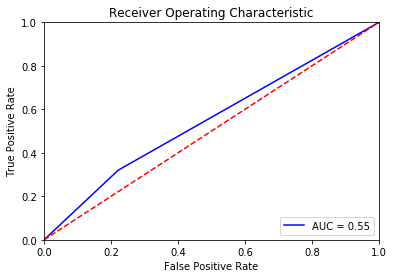

In [69]:
from sklearn.metrics import roc_curve
fpr_pocket, tpr_pocket, threshold_pocket = roc_curve(T_test_pocket, y_pred_pocket)
roc_auc_pocket = auc(fpr_pocket, tpr_pocket)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_pocket, tpr_pocket, 'b', label = 'AUC = %0.2f' % roc_auc_pocket)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

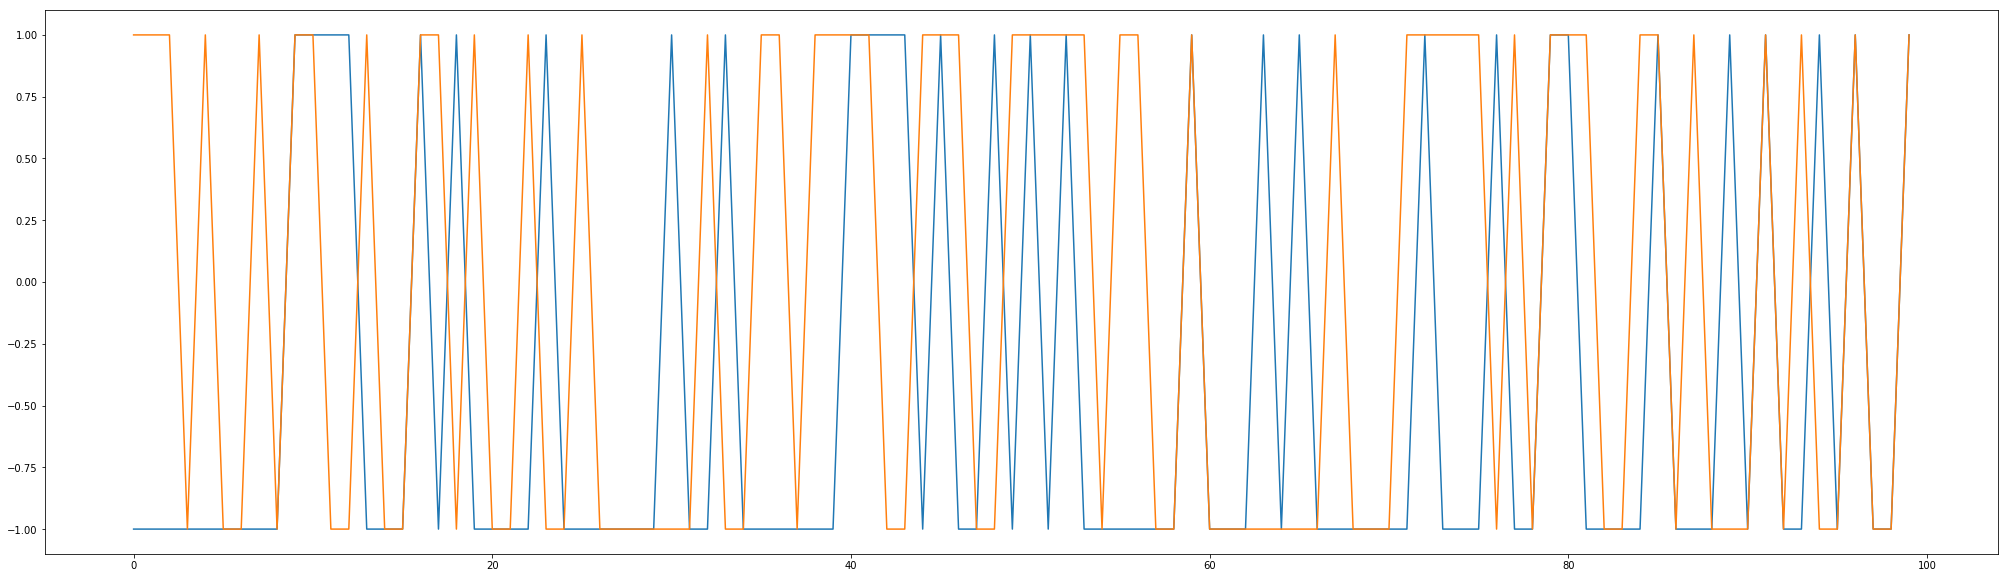

In [86]:
plt.figure(figsize=(35,10))
plt.plot(y_pred_pocket[:100])
plt.plot(T_test_pocket[:100])

### QDA

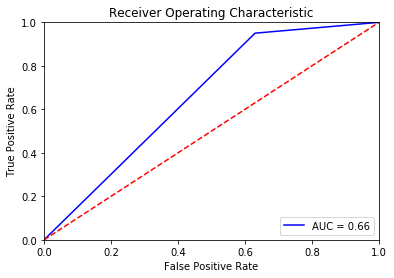

In [41]:
from sklearn.metrics import roc_curve
fpr_qda, tpr_qda, threshold_qda = roc_curve(T_test_qda, y_pred_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_qda, tpr_qda, 'b', label = 'AUC = %0.2f' % roc_auc_qda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

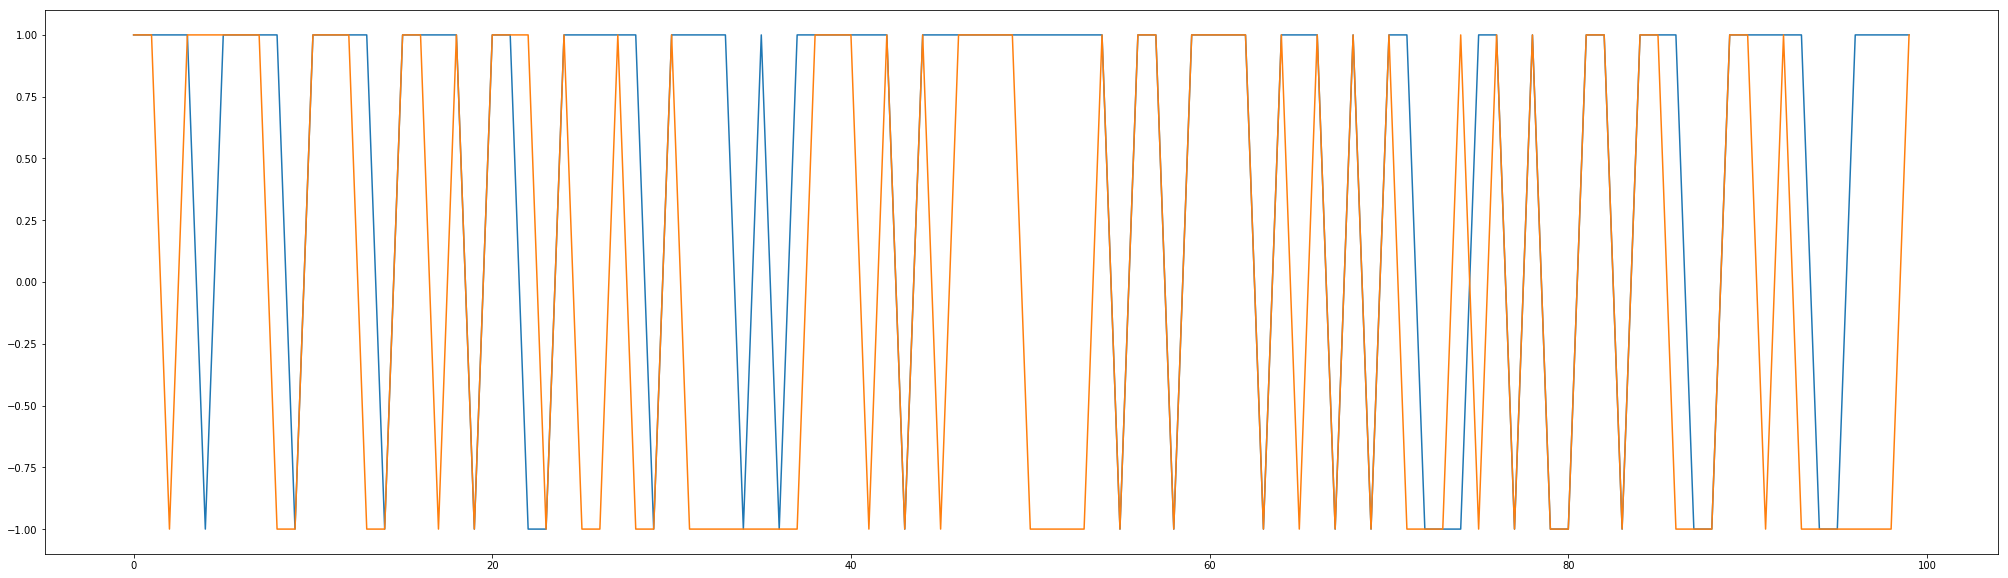

In [87]:
plt.figure(figsize=(35,10))
plt.plot(y_pred_qda[:100])
plt.plot(T_test_qda[:100])

### LDA

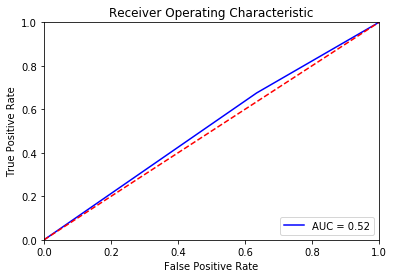

In [54]:
fpr_lda, tpr_lda, threshold_lda = roc_curve(T_test_lda, y_pred_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lda, tpr_lda, 'b', label = 'AUC = %0.2f' % roc_auc_lda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

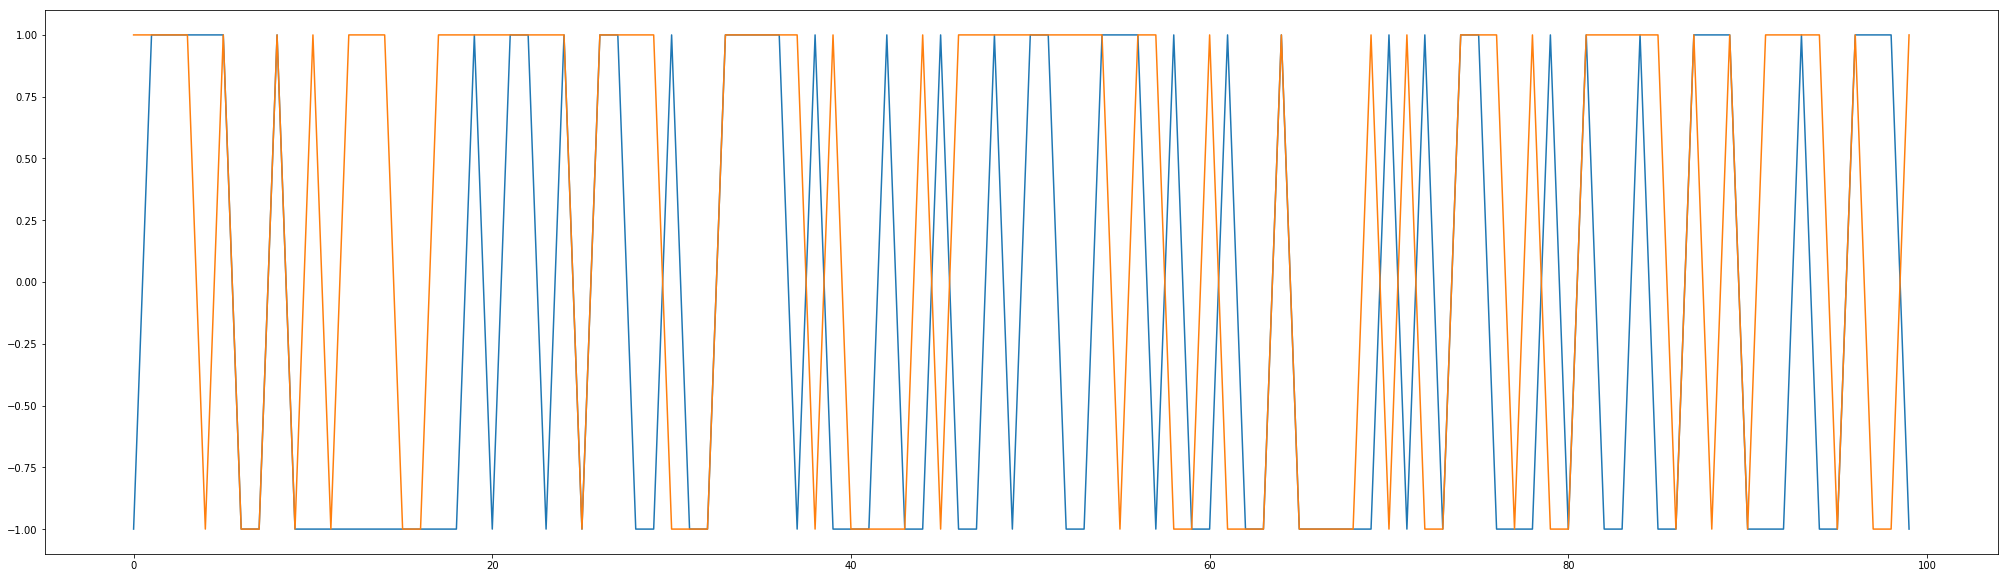

In [88]:
plt.figure(figsize=(35,10))
plt.plot(T_test_lda[:100])
plt.plot(y_pred_lda[:100])

### Logistic Regression

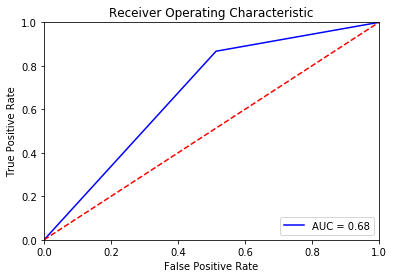

In [66]:
from sklearn.metrics import roc_curve
fpr_logistic, tpr_logistic, threshold_logistic = roc_curve(T_test_logistic_new, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logistic, tpr_logistic, 'b', label = 'AUC = %0.2f' % roc_auc_logistic)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

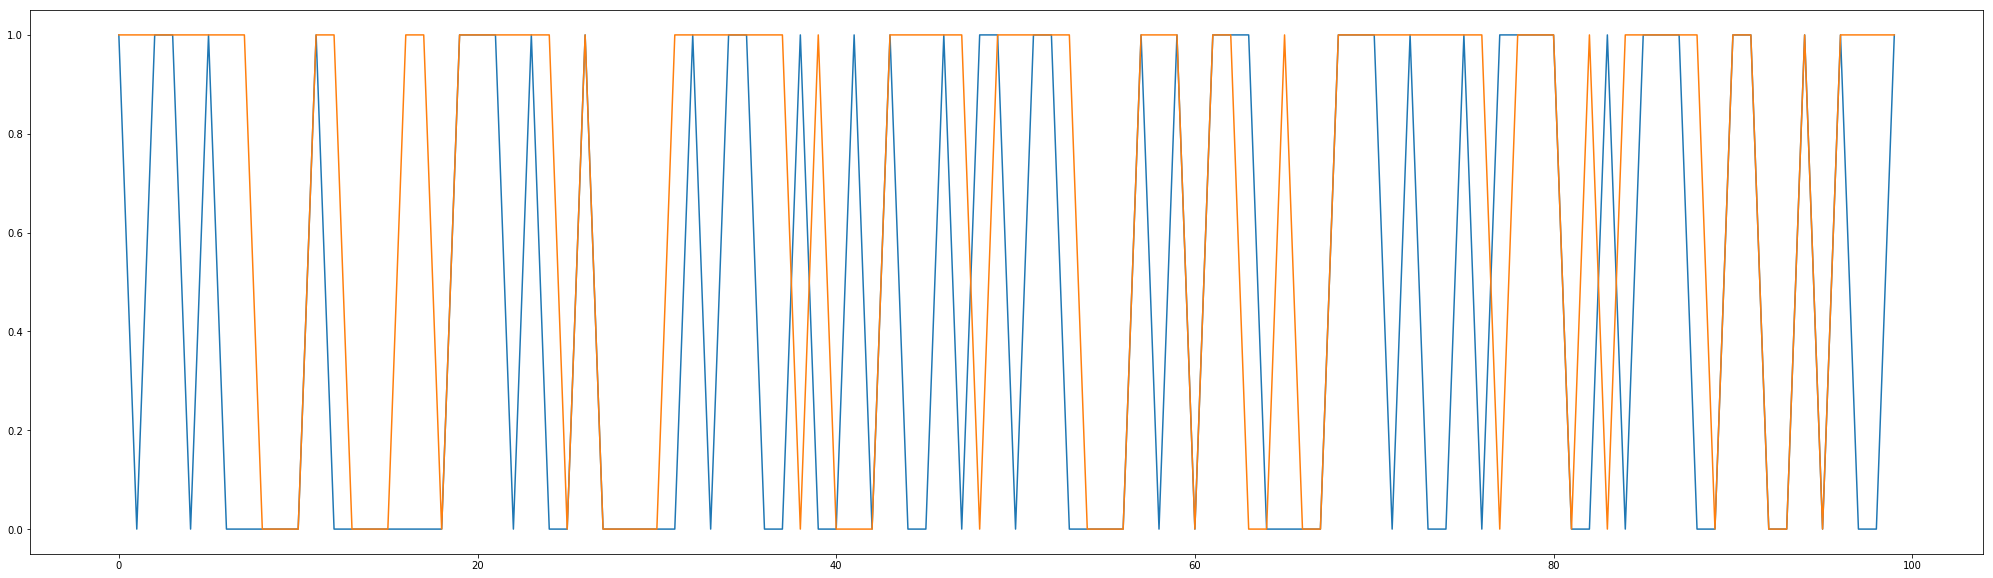

In [91]:
plt.figure(figsize=(35,10))
plt.plot(T_test_logistic_new[:100])
plt.plot(y_pred_logistic[:100])

### Observation

For plotting purpose, We have drwan two types of curve for each algorithm i.e ROC curve and simple plotting of data points between actual test data and predicted values. For latter, I have just used the first 100 datapoints to visualize to have better understanding otherwise for all test data points(5000), we would not be able to understand any thing.

For line plots above for all the algorithms, the blue line are our actual test set while orange line is the predicted ones. 

## Different Model Comparision 

We can differentialte our classification models based of diiferet parameters discussed above and plots drawn above. We have calculated confusion matrix and alogng with that four diiferent paramerters for evaluation metrics i.e Precision, Recall, F1 score and Accuracy. Below we will briefly summarize performance of each algorithm on all of the calculated performance metrics. Based on these value we can easily infer what we want according to our requirement as we have discussed earlier importance of each performance metric.

1. ROC Curve: This curve is one of performance evaluation metric for the binary classification problems. It is plotted against True Postive Rates(TPR) vs False Positive Rate(FPR). ROC is the proabability curve and AUC represents the are under the curve. More the probability or more our ROC curve towards TPR implies more would be area under the curve and more the is correctly predicting the classes.

    So comparing the four a;gorithms on the basis of ROC curve. Our first algorithm i.e Pocket algorithm is performing quite low 
    as it is having less AUC and probability of 55% predicting the correct result. Almost similar is the case for LDA, which is
    predicting 52% of the results correct. While other 2 algorithms i.e QDA and Logistic Regression are performing quite better     then the earlier ones having the 66% and 68% chance of predicting right result.
    
    
2. Precision: Precision also follows similar trends as that of ROC curve. Logistic Regression has the highest precision value among all of them followed by QDA then Pocket and lasty LDA.


3. Recall: In the case of Recall the trend changes slightly from above 2 performance metrics. Recall is highest for QDA(.95) followed by logistic then LDA. But for pocket algorithm Recall is too small(.32) as compared to all other algorithms.


4. F1: This is most important metric forr the evaluation of classification model generally. And almost similar in the case of QDA and Logistic Regression (.72 approx) while for other two algorithm this value is quite low.


5. Accuracy: Similar is the case ofr accuracy, which is higher and almost similar for both QDA and Logistic and for other two its is low and almost similar.


So based on the above information we can clearly interpret that on our dataset **Logistic Regression** and  **QDA** algorithm is performing well as comapred to other two algorithms. Mainly because of its higher F1 score and great Recall Values.   

# Conclusion

In this workbook we have learned and implemented four different classification algorithms Pocket algorith, QDA, LDA, Logistic Regression on 'Forest Cover Type' dataset. This was multi-class dataset having the classes from 1-7 representing the different types forest type. We did  some alterations in our dataset that we have converted this multi-class problem to binary for better understanding and another reason is that the Pocket algorithm is binary classification algorithm but all other can work with muti-class problems. Another alteration was that we have sampled out random 25000 rows from the dataset because original datatset was huge and we would face computation problems.

For data preprocessing part, our data was already encoded and have no null values. We just analyze the data through correlation matrix and some pre visualiztion plots. to understand the attributes. We filter out attributes on the basis of correlation matrix otherwise our mmodels will not predict anything. One of most important plot we havve seen in this case was **distplot** which infers about how our data for that attribute is distributed. We chacked that for 3 columns and found that our data is not well normally distributed and it is skewed. Our two models **QDA** and **LDA** have the basic assumption that our data should in Gaussian Distribution. This is one reason that our these two models did not perform so well on this dataset. But still QDA performs relatively better as comapred to other models except Logistic Regressiion model. 

Based on our evaluation metrics and plots especially ROC-AUC curve discussed above clearly depicts that Pocket algorithm and LDA did not perform well on our dataset as they have very low accuracy (50% approx). On the other hand, other 2 algorithms i.e QDA and Logistic algorithms perform quite well on our data. As they were having very high Recall value and F1 score along with approx 68% accuracy.

# References

Jock A. Blackard, Dr. Denis J. Dean, Dr. Charles W. Anderson, 'Forest Cover Type (Kernels Only), https://www.kaggle.com/c/forest-cover-type-kernels-only/data


Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html 

Aurélien Géron, "Hands on Machine learning with scikit learn and Tensorflow", O'Reilly Media, 2017

# Extra Analysis

In [93]:
from sklearn.model_selection import KFold

In [94]:
dataset_binary.shape

(25000, 13)

In [95]:
X1 = dataset_binary.iloc[:,:-1]
y1 = dataset_binary.iloc[:,-1]
print("Shape of X1: {} and y1: {}".format(X1.shape, y1.shape))

Shape of X1: (25000, 12) and y1: (25000,)


In [103]:
def calcuate_performance(y_test, y_pred):
    precision_logistic = precision_score(y_test, y_pred)
    recall_logistic = recall_score(y_test, y_pred)
    f1_logistic = f1_score(y_test, y_pred)
    accuracy_logistic = accuracy_score(y_test, y_pred)
    print("Precision: {}, Recall: {}, F1: {}, Accuracy: {}".format(precision_logistic, recall_logistic, f1_logistic, accuracy_logistic))

### Logistic Regression

In [96]:
logistic_cross = Logistic(.00003)

In [104]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    
    y_train_new = pd.get_dummies(y_train)
    y_test_new = np.where(y_test == -1, 0,1)
    
    logistic_cross.train(X_train, y_train_new)
    y_pred_logistic = logistic_cross.use(X_test)
    
    calcuate_performance(y_test_new, y_pred_logistic)



Precision: 0.6111929307805597, Recall: 0.86892797319933, F1: 0.7176206121390283, Accuracy: 0.6734
Precision: 0.6063768115942029, Recall: 0.8749477206189878, F1: 0.7163156993665467, Accuracy: 0.6686
Precision: 0.6073835335481981, Recall: 0.869182389937107, F1: 0.7150741635046568, Accuracy: 0.6696
Precision: 0.6310904872389791, Recall: 0.8738955823293173, F1: 0.7329067025934659, Accuracy: 0.6828
Precision: 0.6068003487358327, Recall: 0.8685524126455907, F1: 0.7144568006843457, Accuracy: 0.6662


Above we have performed the cross validation on **Logistic Regression** i.e we are partioning the data into 5 and analyzing the beahviour on our datasets.

We calculated all the performance metrics paramerters on all the sets and observed that there is no significant change in any but there is slighlty increase in the observation, whre all the parameters have increased slightly.

### QDA

In [105]:
qda_cross = QDA()

In [112]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    X_train_negatives = X_train[y_train == -1]
    X_train_positives = X_train[y_train == 1]
    X_train_new = pd.concat([X_train_negatives, X_train_positives], axis= 0)
    
    N1 = X_train_negatives.shape[0]
    N2 = X_train_positives.shape[0]
    
    qda_cross.train(X_train_new, N1, N2)
    d1, d2 = qda_cross.use(X_test)

    d3 = np.argmax((d1, d2), axis=0)
    y_pred_qda = np.where(d3 == 0, -1, 1)
    
    calcuate_performance(y_test, y_pred_qda)

Precision: 0.5806285419886656, Recall: 0.9438860971524288, F1: 0.7189792663476874, Accuracy: 0.6476
Precision: 0.5751203445654928, Recall: 0.9493935591802594, F1: 0.7163142947301988, Accuracy: 0.6404
Precision: 0.5785420944558521, Recall: 0.9450733752620545, F1: 0.7177201082630154, Accuracy: 0.6454
Precision: 0.5979224727641247, Recall: 0.9477911646586346, F1: 0.7332608357930713, Accuracy: 0.6566
Precision: 0.5746136306055232, Recall: 0.9434276206322796, F1: 0.714218233349079, Accuracy: 0.637


Similar steps I performed for the QDA algorithm and found that it is aslo showing similar behaviour as that of Logistic algorithm. There is slight improvement in the evaluation metrics parameters in the 4 step. 

### LDA

In [115]:
X2 = dataset_binary.iloc[:,:-1]
y2 = dataset_binary.iloc[:,-1]
print("Shape of X1: {} and y1: {}".format(X2.shape, y2.shape))

Shape of X1: (25000, 12) and y1: (25000,)


In [116]:
lda_cross = LDA()

In [121]:
kf_lda = KFold(n_splits=5)
scores = []
for train_index, test_index in kf_lda.split(X1, y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    X_train_negatives = X_train[y_train == -1]
    X_train_positives = X_train[y_train == 1]
    X_train_new = pd.concat([X_train_negatives, X_train_positives], axis= 0)
    
    N1 = X_train_negatives.shape[0]
    N2 = X_train_positives.shape[0]
    
    X_train_new = X_train_new.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values
    
    lda_cross.train(X_train_new, N1, N2)
    d1, d2 = lda_cross.use(X_test)

    d3 = np.argmax((d1, d2), axis=0)
    y_pred_qda = np.where(d3 == 0, -1, 1)
    
    calcuate_performance(y_test, y_pred_qda)


Precision: 0.5011068068622025, Recall: 0.7583752093802345, F1: 0.603465511496168, Accuracy: 0.524
Precision: 0.49033232628398793, Recall: 0.6787954830614805, F1: 0.5693737940712156, Accuracy: 0.509
Precision: 0.4951747088186356, Recall: 0.6238993710691824, F1: 0.5521335807050092, Accuracy: 0.5172
Precision: 0.5106826472120897, Recall: 0.7871485943775101, F1: 0.6194690265486725, Accuracy: 0.5184
Precision: 0.49446709376820036, Recall: 0.7063227953410982, F1: 0.5817060637204522, Accuracy: 0.5116


For the case of LDA there are slightly better changes in performance metrics parameters. Like for $ 4^{th}$ iteration F1 and Recall scores have invreased by 4% as comapred to the previous ones.          

### Pocket

In [119]:
pocket = Perceptron(.00002)

In [123]:
kf = KFold(n_splits=5)
scores = []
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test = X1.iloc[train_index].values, X1.iloc[test_index].values
    y_train, y_test = y1.iloc[train_index].values, y1.iloc[test_index].values

    perceptron.train(X_train, y_train)
    y_pred = perceptron.use(X_test)

    y_pred_pocket = np.where(y_pred < 0, -1, 1)
        
    calcuate_performance(y_test, y_pred_pocket)



Precision: 0.5861513687600645, Recall: 0.304857621440536, F1: 0.4011019283746557, Accuracy: 0.5652
Precision: 0.5656482246077622, Recall: 0.2864910079464659, F1: 0.3803442531926708, Accuracy: 0.5536
Precision: 0.5480769230769231, Recall: 0.31069182389937106, F1: 0.3965747926143966, Accuracy: 0.549
Precision: 0.5887622149837134, Recall: 0.29036144578313255, F1: 0.38891877353415816, Accuracy: 0.5456
Precision: 0.5435267857142857, Recall: 0.4051580698835274, F1: 0.4642516682554814, Accuracy: 0.5504


For the pocket algorithm I rum the algorithm for 1 iteration due to computation issue and found that parameters like Recall and F1 score increased by 8% and 6% respectively. It can show better results if it runs on more number of iterations.